![flight.jpg](flight.jpg)

<h3 style="color: rgb(70, 80, 96); opacity: 0.8;  letter-spacing: 2px; line-height: 1.6">Zomato is an online food delivery and restaurant discovery platform that operates through a website and mobile app.
Zomato dataset is a collection of restaurants that are registered on Zomato in Bengaluru City.Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in more than 1,000 Indian cities.First,Analysis the data and get useful insight.Then ,using classification models to classify restaurants based on "Rating"
</h3>

<h4 style="color: rgb(70, 80, 96); opacity: 0.8;  letter-spacing: 2px; line-height: 1.6">First,analysis the data and get useful insight.Then,using classification models to classify restaurants based on "Rating".
</h4>

# importing all the necessary libraries !

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read data..

In [2]:
train_data=pd.read_excel(r'Data_Train.xlsx')
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Columns Description

- **Airline**: The name of the airline providing the flight service.
- **Date_of_Journey**: The date when the journey is scheduled to take place.
- **Source**: The starting location of the flight.
- **Destination**: The final destination of the flight.
- **Route**: The specific route taken by the flight.
- **Dep_Time**: The departure time of the flight.
- **Arrival_Time**: The arrival time of the flight.
- **Duration**: The total duration of the flight.
- **Total_Stops**: The number of stops during the flight.
- **Additional_Info**: Additional information related to the flight.
- **Price**: The cost or price of the flight.

### Objective of the Project

The dataset appears to contain information about different flights, including details such as the airline, journey date, source, destination, route, timings, duration, stops, additional information, and price. The potential objectives for this project could include:

- **Flight Price Prediction**: Analyzing factors affecting flight prices and building a predictive model for flight prices.

In [4]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
### getting all the rows where we have missing value
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### as we have 1 missing value , I can directly drop these

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Pre-process & Perform Featurization of "Date_of_Journey"
    I will pre-process dataset & extract day,month,year from "Date_of_Journey" feature..

In [11]:
data=train_data.copy()

In [12]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

**I can see that Date_of_Journey is a object data type,
Therefore, I has to convert this datatype into timestamp bcz our 
model will not be able to understand these string values,it just understand Time-stamp..**

**For this we require pandas to_datetime to convert object data type to datetime dtype.**

In [14]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Date_of_Journey'].min()

Timestamp('2019-03-01 00:00:00')

In [19]:
data['Date_of_Journey'].max()

Timestamp('2019-06-27 00:00:00')

- **it means our data belongs to 2019 year only, hence extracting year feature & consider this as a input to my machine learning model makes no sense !**
- **but if we have more than 1 year  , then of-course it may impact !**

## lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [20]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [21]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [22]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [23]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-08 05:50:00,2024-01-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [24]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [25]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-01-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-08 05:50:00,2024-01-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


## Lets try to clean Dep_Time & Arrival_Time & featurize it..

In [26]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [27]:
# Departure time is when a plane leaves the gate

extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


## lets Featurize 'Arrival_Time' !

In [28]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [29]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


## lets analyse when will most of the flights will take-off

- **Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.**

In [30]:
def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early Morning'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Afternoon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Midnight'
    else:
        return 'Late night'

<Axes: xlabel='Dep_Time_hour'>

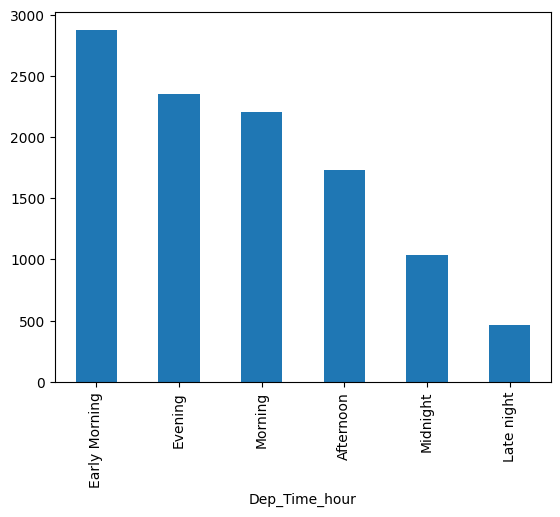

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

## lets use Cufflinks & plotly to make your visuals more interactive !

In [32]:
# !pip install chart_studio
# !pip install cufflinks

In [33]:
## Lets use Plotly interactive plots directly with Pandas dataframes, but First u need below set-up !
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected =True)

In [34]:
cf.go_offline()

In [35]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [36]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


## Pre-process Duration Feature & extract meaningful features 

Lets Apply pre-processing on duration column,
-->> - **Once we pre-processed our Duration feature , lets featurize this feature & extract Duration hours and minute from duration..**


-->> - **As my ML model is not able to understand this duration as it contains string values , thats why we have to tell our
Ml Model that this is Duration_hour & this Duration_is minute..**

In [37]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [38]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [39]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
data['Duration'][0].split(' ')[0]

'2h'

In [41]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [42]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [43]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [44]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [45]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25


## Lets Analyse whether Duration impacts on Price or not ?

In [46]:
'2*60+50*1'

'2*60+50*1'

In [47]:
### eval is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.
eval('2*60+50*1')

170

In [48]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [49]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


- ** It Plot data and regression model fits across a FacetGrid.. (combination of 'regplot` and :class:`FacetGrid) **
- ** its a extended form of scatter plot..**

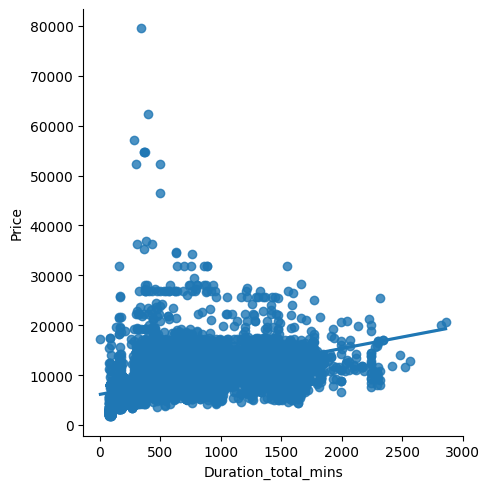

In [50]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

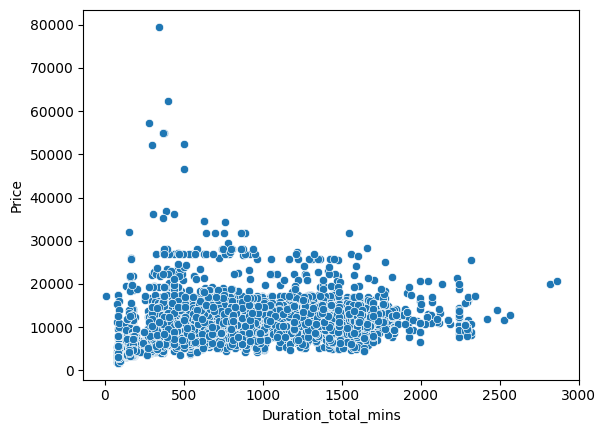

In [51]:
sns.scatterplot(x='Duration_total_mins',y='Price',data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

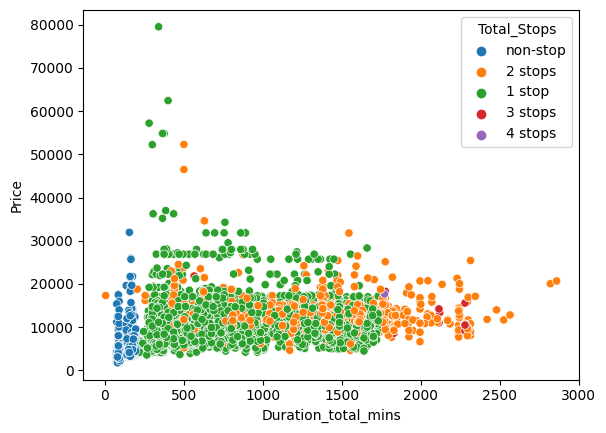

In [52]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue="Total_Stops", data=data)

#### Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

## which city has maximum final destination of flights ?

In [53]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: ylabel='count'>

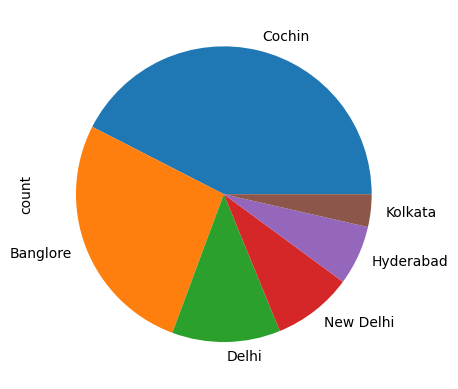

In [54]:
data['Destination'].value_counts().plot(kind='pie')

***
Inference->> 
Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,
***

## Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights
    Problem Statement-->> on which route Jet Airways is extremely used???

In [55]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [56]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price Analysis
    - finding price distribution & 5-point summary of each Airline..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

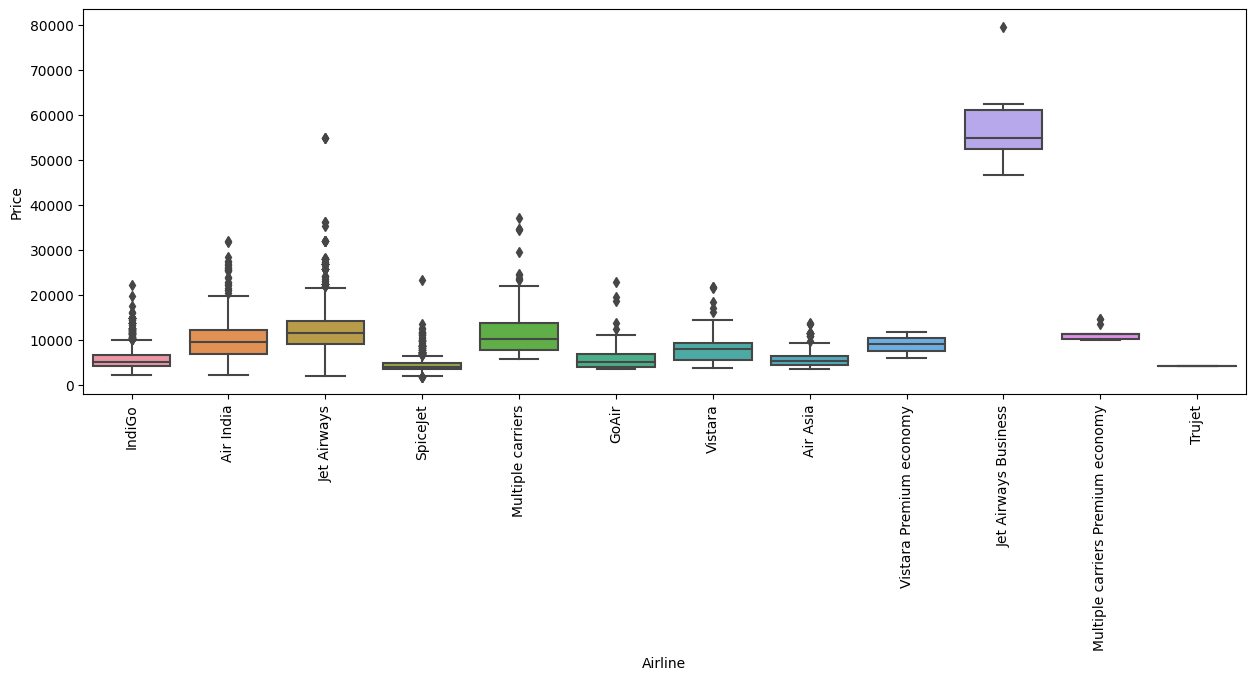

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [150]:
# fig = px.box(data, x='Airline', y='Price',
#              title='Flight Prices by Airline',
#              labels={'Airline': 'Airline', 'Price': 'Flight Price'},
#              template='plotly_dark')
fig = px.box(data.sort_values('Price',ascending=False), x='Airline', y='Price',
             title='Flight Prices by Airline',
             labels={'Airline': 'Airline', 'Price': 'Flight Price'})

fig.update_layout(xaxis_title='Airline', yaxis_title='Flight Price')
fig.show()

- Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

##### when we need boxplot + distribution both , its good to consider violinplot..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

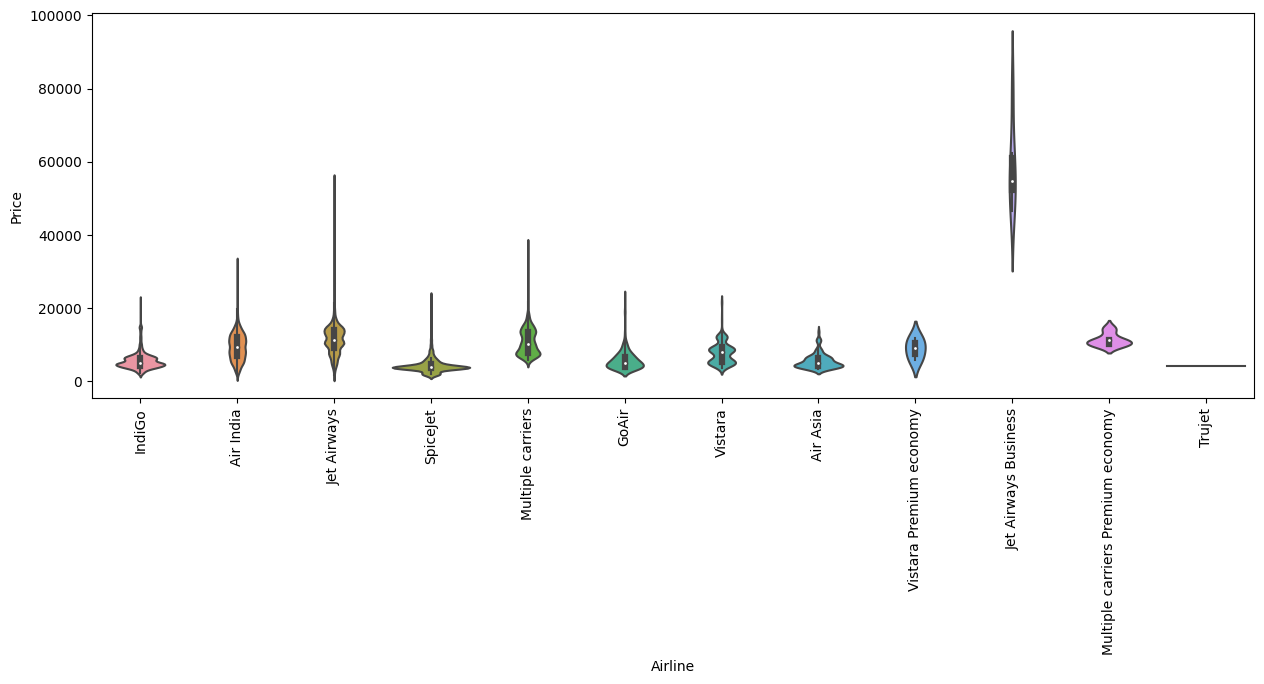

In [59]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [151]:
fig = px.violin(data, x='Airline', y='Price',
                title='Flight Prices Distribution by Airline',
                labels={'Airline': 'Airline', 'Price': 'Flight Price'},
                template='plotly_dark')

fig.update_layout(xaxis_title='Airline', yaxis_title='Flight Price')
fig.show()

## Lets Perform Feature-Encoding on Data !
    Applying one-hot on data !

- **Lets remove some of the un-necessary features !**

In [61]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325


In [62]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

Additional_Info
No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: count, dtype: float64

- **Additional_Info contains almost 80% no_info,so we can drop this column**
- **we can drop Route as well as we have pre-process that column**
- **lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"**

In [63]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [64]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [65]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25


## Lets separate categorical data & numerical data !
    categorical data are those whose data-type is 'object'
    Numerical data are those whose data-type is either int of float

In [66]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [67]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [68]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

## Handling Categorical Data
   - We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
   - if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
   - if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case
   - But in real-world , it is not necessary that u have to always One-hot or label.

### Lets apply one-hot encoding on 'Source' feature !

- **One-hot from scratch :**

In [69]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [70]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [71]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [72]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [73]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## Performing Target Guided Mean Encoding !
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
    lets use Target Guided Mean Encoding in order to get rid of this..

In [74]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [75]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [76]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [77]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [78]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [79]:
data['Airline']=data['Airline'].map(dict1)

In [80]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [81]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [82]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

   - **Note: till now , Delhi (Capital of India) has one Airport & its second Airport is yet to build in Greater Noida (Jewar)**
   - **which is part of NCR , so we will consider New Delhi & Delhi as same ...**
   - **but in future , these conditions may change..**

In [83]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [84]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [85]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [86]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [87]:
dict2={key:index for index,key in enumerate(dest,0)}

In [88]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [89]:
data['Destination']=data['Destination'].map(dict2)

In [90]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [91]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


### Perform Manual Encoding on Total_stops feature

In [92]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [93]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [94]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [95]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Performing Outlier Detection !
    Here the list of data visualization plots to spot the outliers.
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot

**CAUSE FOR OUTLIERS**
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

In [96]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)   

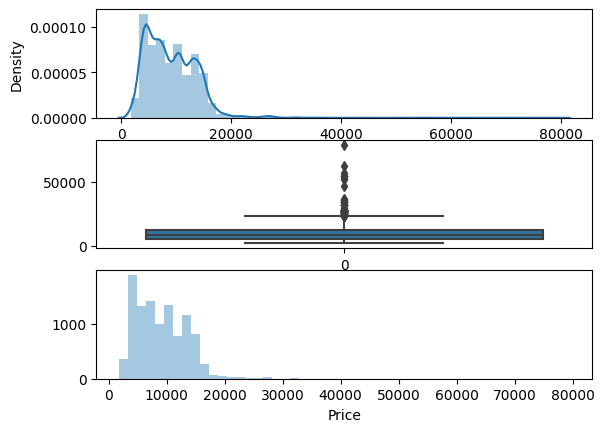

In [97]:
plot(data,'Price')

## Getting a high level overview of various ways to deal with outliers:


## Dealing with Outliers

### 1. Statistical Imputation
   - Impute outliers with the mean, median, or mode of the data.

### 2. Z-Score (Standard Deviation) Approach
   - **For Gaussian Distributed Data:**
      - Identify outliers using the 3 standard deviation (3 sigma) approach.
      - Upper Boundary: \( \mu + 3 \times \sigma \)
      - Lower Boundary: \( \mu - 3 \times \sigma \)
      - Data points greater than the upper boundary are outliers.
      - Data points less than the lower boundary are outliers.
      - *Extended Version:* Robust Z-Score (Median Absolute Deviation).
         - The Robust Z-Score, also known as the Median Absolute Deviation method, is resilient to outliers and uses the median instead of the mean.

### 3. IQR (Interquartile Range) Approach
   - **For Skewed Data:**
      - Identify outliers using the Interquartile Range (IQR) method.
      - Upper Boundary: \( Q3 + 1.5 \times IQR \)
      - Lower Boundary: \( Q1 - 1.5 \times IQR \)
      - *Extended Version:* Winsorization Method (Percentile Capping).
        - Data points beyond the 99th percentile or below the 1st percentile are treated as outliers.
         - Winsorization helps mitigate the impact of extreme values on statistical analyses.

### 4. Isolation Forest
   - **For High-Dimensional Data:**
      - Use Isolation Forest, a clustering algorithm based on decision trees.
      - It classifies data points as outliers or not outliers.
      - Result: 
         - If the result is -1, the data point is an outlier.
         - If the result is 1, the data point is not an outlier.
      - *Advantage:* Effective for high-dimensional data where traditional methods may struggle.
      - *Consideration:* Requires tuning for optimal performance.

In summary, various methods exist to handle outliers, each suited to specific data characteristics and distributions. Selecting the appropriate method depends on the nature of the data and the desired outcome of the analysis.


In [98]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

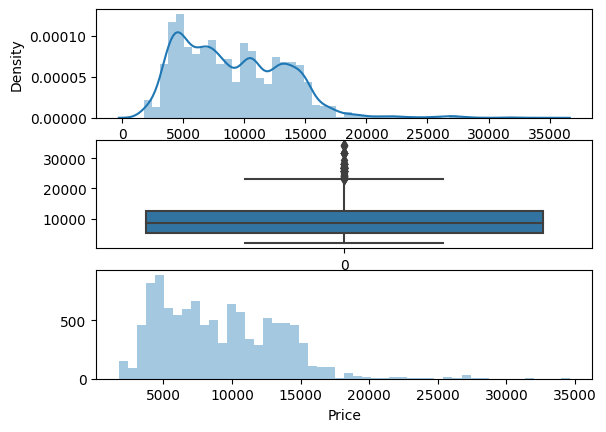

In [99]:
plot(data,'Price')

In [100]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [101]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [102]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [103]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int32
journey_month            int32
Dep_Time_hour            int32
Dep_Time_minute          int32
Arrival_Time_hour        int32
Arrival_Time_minute      int32
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

## Performing Feature Selection !

## Feature Selection Techniques Overview

### Importance of Feature Selection
Feature selection is crucial to identify the most significant features contributing to the target variable. It helps in avoiding the curse of dimensionality and enhances model interpretability and performance.

### Techniques for Feature Selection in Regression Use-Cases

#### a. SelectKBest
   - **Score Functions:**
      - For Regression: f_regression, mutual_info_regression
   - **f_regression:**
      - Based on Pearson correlation.
   - **mutual_info_regression:**
      - Utilizes various statistical tests like Chi-square, Anova, and p-value.
   - **Application:**
      - Choose the k most important features based on their scores.
      - Helpful for linear relationships.

#### b. ExtraTreesClassifier
   - This technique assigns a score to each feature in the dataset.
   - The higher the score, the more relevant the feature is.
   - **Application:**
      - Suitable for both regression and classification tasks.
      - Identifies feature importance through tree-based methods.
      - Provides insights into the significance of each feature.

### Importance of Feature Selection
   - **Curse of Dimensionality:**
      - Feature selection helps address the challenge of having redundant or irrelevant features.
      - Enhances model efficiency and interpretability.
      - Reduces computational complexity and training time.

In summary, feature selection is essential to enhance model performance, reduce redundancy, and improve interpretability. The choice of technique depends on the nature of the data and the specific goals of the analysis.

In [104]:
from sklearn.feature_selection import mutual_info_regression

In [105]:
X=data.drop(['Price'],axis=1)

In [106]:
y=data['Price']

In [107]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int32
journey_month          int32
Dep_Time_hour          int32
Dep_Time_minute        int32
Arrival_Time_hour      int32
Arrival_Time_minute    int32
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [108]:
mutual_info_regression(X,y)

array([0.97105435, 1.00464638, 0.78693351, 0.22945943, 0.6258985 ,
       0.34097511, 0.26153577, 0.4041735 , 0.35507088, 0.47097215,
       0.34219791, 0.39064334, 0.45672213, 0.5264595 , 0.13842346,
       0.19916836])

In [109]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [110]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.003002
Airline,0.970395
Total_Stops,0.791651
journey_month,0.623117
Source_Delhi,0.521874
Duration_hours,0.470756
Source_Kolkata,0.460765
Arrival_Time_hour,0.403571
Source_Banglore,0.389036
Arrival_Time_minute,0.342510


## Lets build ML Model  , then later on we can think of saving it..

#### split dataset into train & test

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [113]:
X_train

,Airline,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
752,3,4,1,27,5,16,0,21,0,5,0,0,0,1,0,0
7430,3,3,0,6,3,15,10,17,45,2,35,0,1,0,0,0
5478,10,3,1,12,6,18,55,19,50,24,55,0,1,0,0,0
3445,10,4,1,6,6,11,30,4,25,16,55,0,0,1,0,0
9126,10,4,1,9,5,20,55,4,25,7,30,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,10,4,1,27,3,9,0,4,25,19,25,0,0,1,0,0
5191,10,3,1,9,5,14,5,20,45,6,40,0,1,0,0,0
5390,8,4,1,15,5,12,50,1,30,12,40,0,0,1,0,0
860,3,2,0,3,3,0,40,3,25,2,45,1,0,0,0,0


#### what we often do in modelling:
    a..Initially ,lets build basic random forest model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
ml_model=RandomForestRegressor()

In [116]:
model=ml_model.fit(X_train,y_train)

In [117]:
y_pred=model.predict(X_test)

In [118]:
y_pred

array([16917.14,  5337.37,  8918.24, ...,  3486.1 ,  6243.85,  6865.16])

In [119]:
y_pred.shape

(2671,)

In [120]:
len(X_test)

2671

### to save ML model into disk

**lets try to dump ml model using pickle & joblib..**
- advantage of dumping--
- imagine in future we have new data ,& lets say we have to predict price on this huge data
- then just for this new data , we have to execute all the above cells follow the entire pipeline,  then only we are able to predict on this...
- so to get rid of such issue , will just dump it to reuse it again & again..
- what does this file store??
- this save coefficients of our model.. not an entire dataset

In [121]:
# !pip install joblib

In [122]:
from joblib import dump, load

In [123]:
dump(model, 'RandomForest.joblib')

['RandomForest.joblib']

In [124]:
forest= load('RandomForest.joblib')

In [125]:
forest.predict(X_test)

array([16917.14,  5337.37,  8918.24, ...,  3486.1 ,  6243.85,  6865.16])

## Defining your own evaluation metric :

In [126]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [127]:
mape(y_test,forest.predict(X_test))

13.126129111356283

## How to Automate ML Pipeline :

In [128]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9515457924123175
Predictions are : [16960.96  5389.45  8919.31 ...  3518.49  6195.47  6817.85]


r2_score: 0.8087554702215971
MSE :  3723071.9439293803
MAE :  1177.1777496940847
RMSE :  1929.5263522246541
MAPE :  13.19497164436387


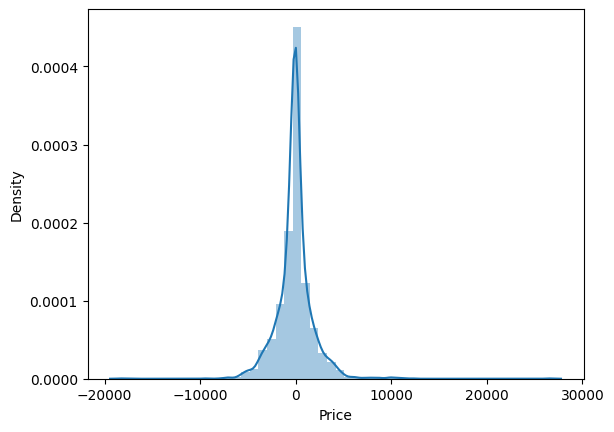

In [129]:
predict(RandomForestRegressor())

## how to hypertune ml model
    Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model 
    4.Check best parameters and best score

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [132]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [133]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [134]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [135]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [136]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [137]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [138]:
### to get your best model..
rf_Random.best_params_

{'n_estimators': 1080,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 13}

In [139]:
pred2=rf_Random.predict(X_test)

In [140]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8098821325219172

## hyperparameter tuning for all machine learning models using pipelines

In [141]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from joblib import dump
import numpy as np

In [142]:
# Create pipelines for different models with hyperparameter tuning
pipelines = [
    ('Random Forest', Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor())])),
    ('Linear Regression', Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])),
    ('Support Vector Regressor', Pipeline([('scaler', StandardScaler()), ('regressor', SVR())])),
    ('Gradient Boosting', Pipeline([('scaler', StandardScaler()), ('regressor', GradientBoostingRegressor())])),
    ('AdaBoost', Pipeline([('scaler', StandardScaler()), ('regressor', AdaBoostRegressor())])),
    ('Decision Tree', Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor())])),
    ('K-Nearest Neighbors', Pipeline([('scaler', StandardScaler()), ('regressor', KNeighborsRegressor())])),
    ('Ridge Regression', Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])),
    ('Lasso Regression', Pipeline([('scaler', StandardScaler()), ('regressor', Lasso())])),
    ('ElasticNet', Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet())])),
    ('XGBoost', Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor())]))
]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Random Forest: {'regressor__n_estimators': 900, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 110, 'regressor__bootstrap': False}
Model: Random Forest
r2_score: 0.8239722043078915
MSE :  3426838.656522096
MAE :  1175.5484423507899
RMSE :  1851.1722384808218
MAPE :  13.305754543267948


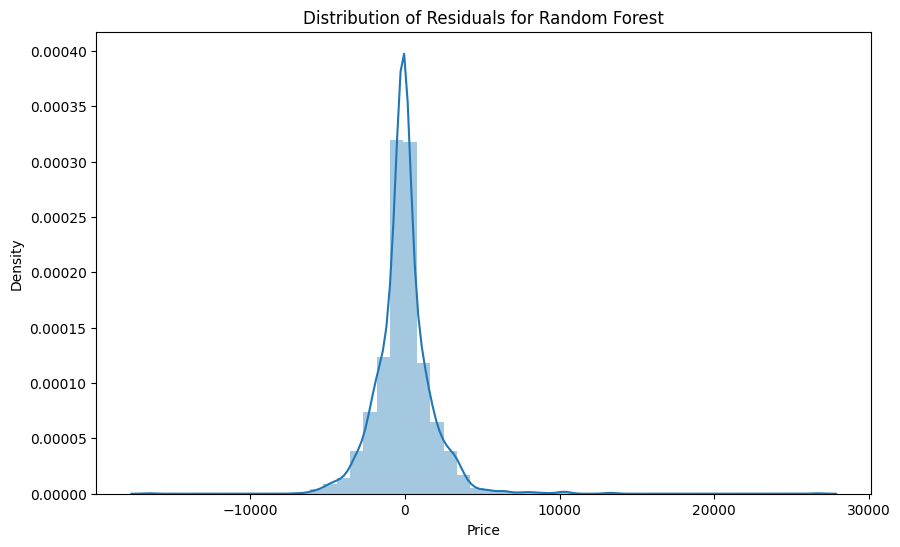

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best hyperparameters for Linear Regression: {'regressor__fit_intercept': True, 'regressor__copy_X': True}
Model: Linear Regression
r2_score: 0.5710609831785054
MSE :  8350413.060364061
MAE :  2014.0175451276943
RMSE :  2889.70812719279
MAPE :  24.896544079965974


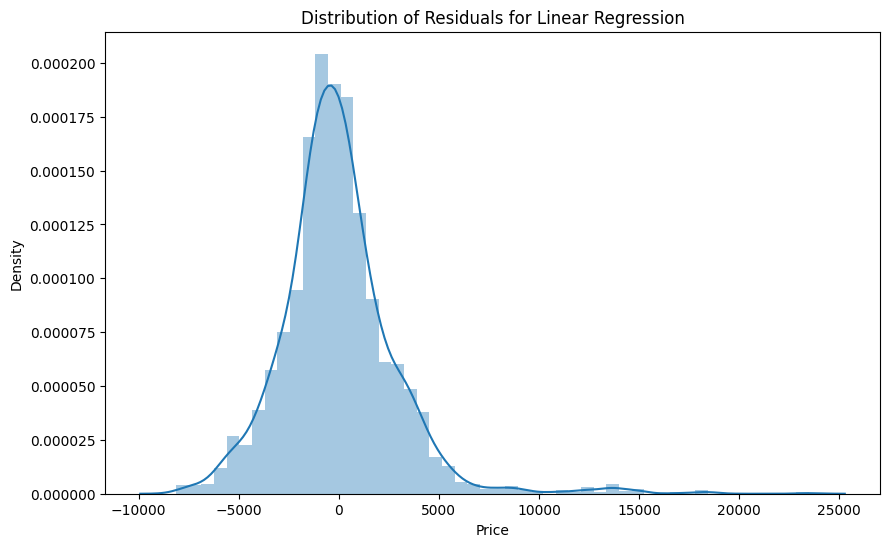

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Support Vector Regressor: {'regressor__kernel': 'rbf', 'regressor__gamma': 'scale', 'regressor__epsilon': 0.5, 'regressor__degree': 3, 'regressor__C': 100}
Model: Support Vector Regressor
r2_score: 0.5892275852797187
MSE :  7996752.923376478
MAE :  1792.698559561086
RMSE :  2827.85305901429
MAPE :  19.73606800763164


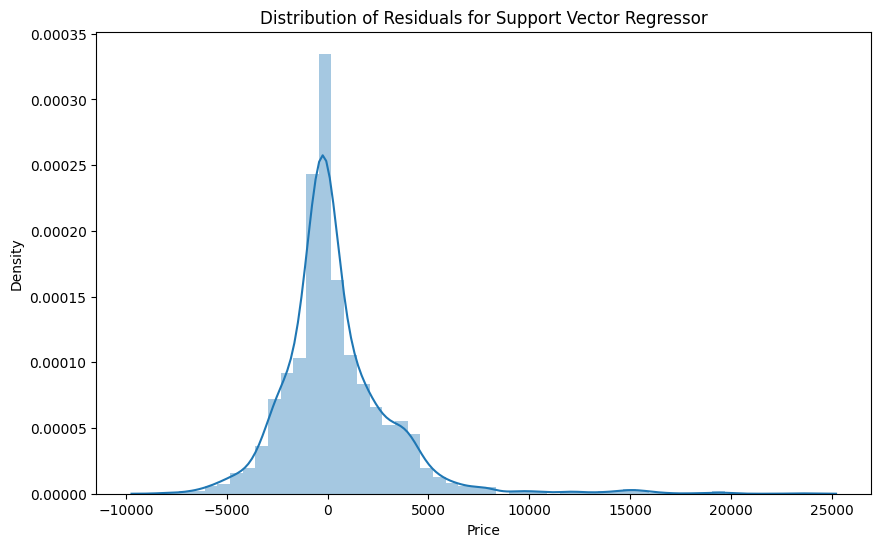

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Gradient Boosting: {'regressor__subsample': 0.8, 'regressor__n_estimators': 700, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 8, 'regressor__learning_rate': 0.01}
Model: Gradient Boosting
r2_score: 0.8402679084994897
MSE :  3109600.411053791
MAE :  1128.5256758576982
RMSE :  1763.4059121636717
MAPE :  12.75156737260745


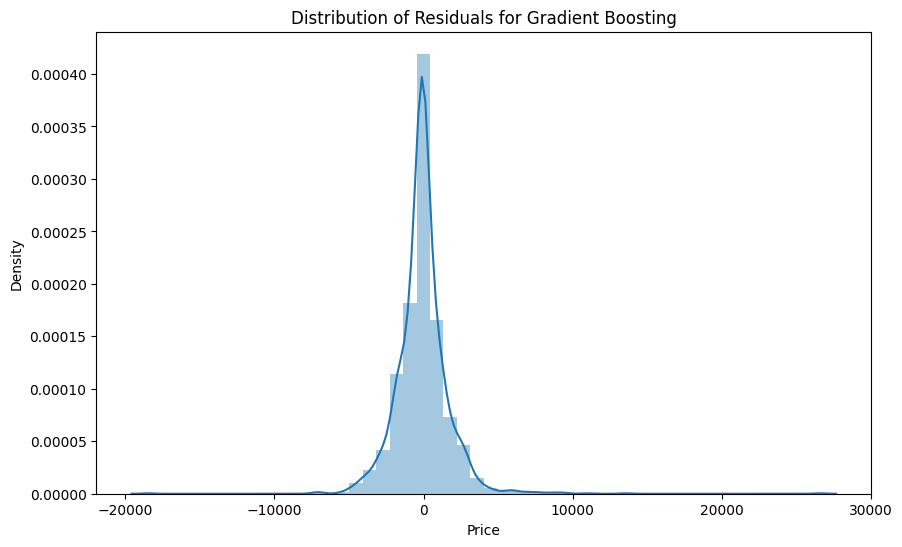

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for AdaBoost: {'regressor__n_estimators': 100, 'regressor__loss': 'exponential', 'regressor__learning_rate': 0.1}
Model: AdaBoost
r2_score: 0.632912987269163
MSE :  7146303.006222593
MAE :  1982.754231483745
RMSE :  2673.257003399148
MAPE :  26.424465563025244


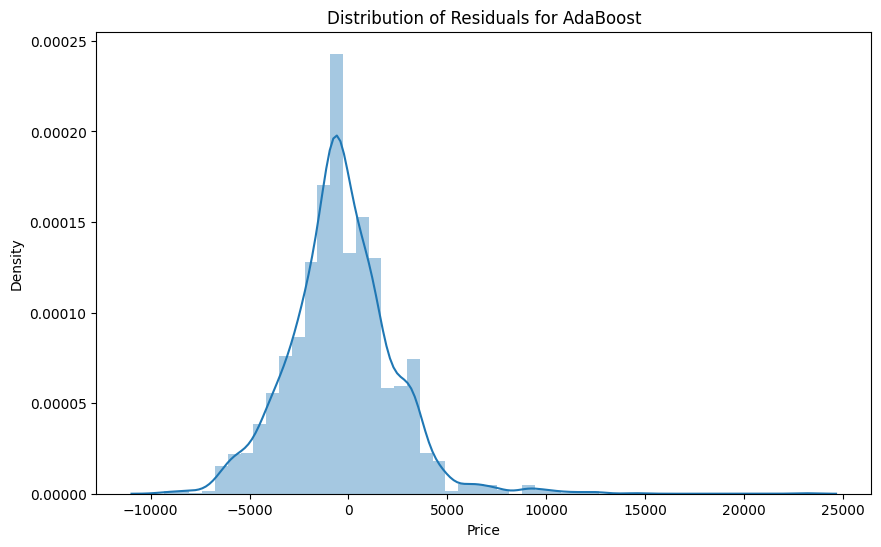

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Decision Tree: {'regressor__splitter': 'best', 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 50, 'regressor__criterion': 'poisson'}
Model: Decision Tree
r2_score: 0.7139752548839213
MSE :  5568215.232326513
MAE :  1375.7423320310013
RMSE :  2359.706598780135
MAPE :  15.320281155357888


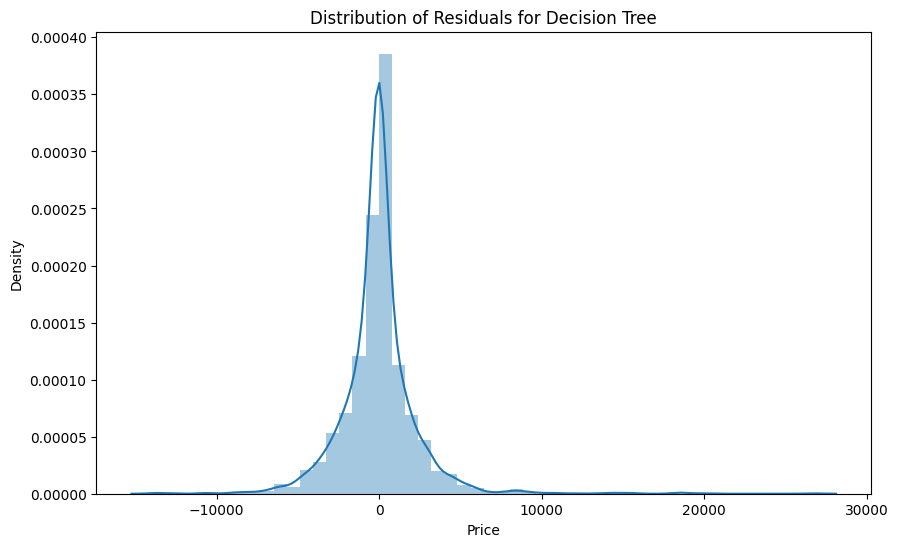

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for K-Nearest Neighbors: {'regressor__weights': 'uniform', 'regressor__p': 1, 'regressor__n_neighbors': 7, 'regressor__algorithm': 'brute'}
Model: K-Nearest Neighbors
r2_score: 0.7574331852352159
MSE :  4722193.641959367
MAE :  1401.4365941060062
RMSE :  2173.060892372638
MAPE :  15.782632980909542


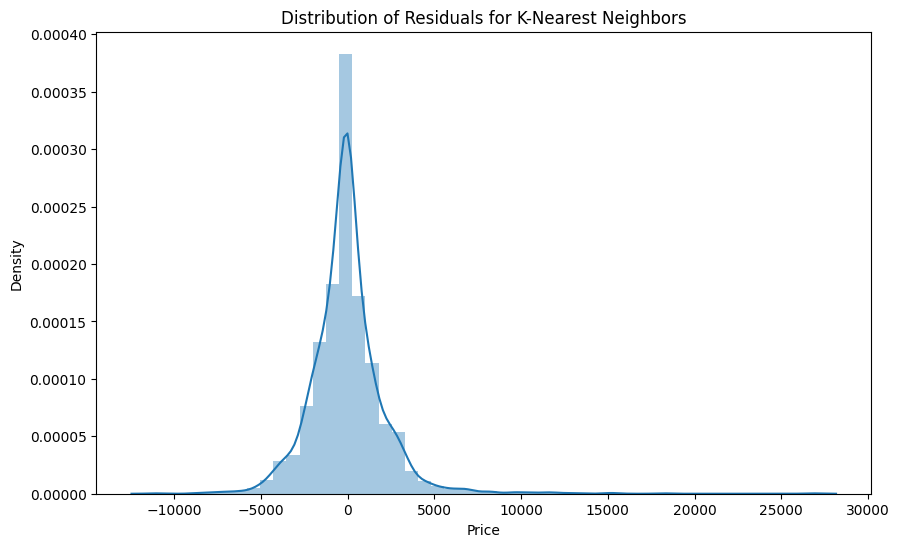

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Ridge Regression: {'regressor__tol': 1e-05, 'regressor__solver': 'sparse_cg', 'regressor__random_state': 42, 'regressor__positive': False, 'regressor__max_iter': 100, 'regressor__fit_intercept': True, 'regressor__copy_X': True, 'regressor__alpha': 0.24770763559917114}
Model: Ridge Regression
r2_score: 0.5710965061752632
MSE :  8349721.512884265
MAE :  2014.0094318646354
RMSE :  2889.588467737969
MAPE :  24.89796126525608


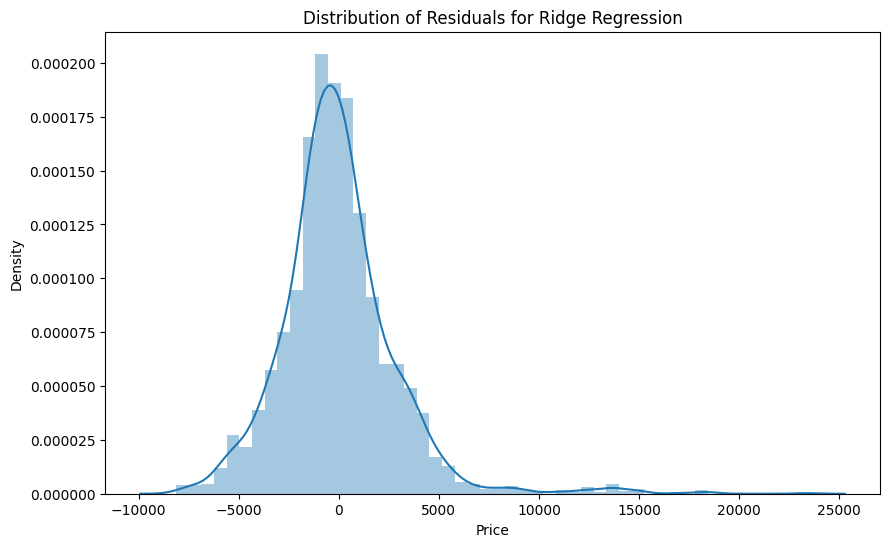

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Lasso Regression: {'regressor__warm_start': True, 'regressor__tol': 1e-05, 'regressor__selection': 'random', 'regressor__random_state': 42, 'regressor__precompute': True, 'regressor__positive': False, 'regressor__max_iter': 1000, 'regressor__fit_intercept': True, 'regressor__copy_X': True, 'regressor__alpha': 0.3593813663804629}
Model: Lasso Regression
r2_score: 0.5710900938238619
MSE :  8349846.34597426
MAE :  2013.8806372834938
RMSE :  2889.610068153532
MAPE :  24.89469716224369


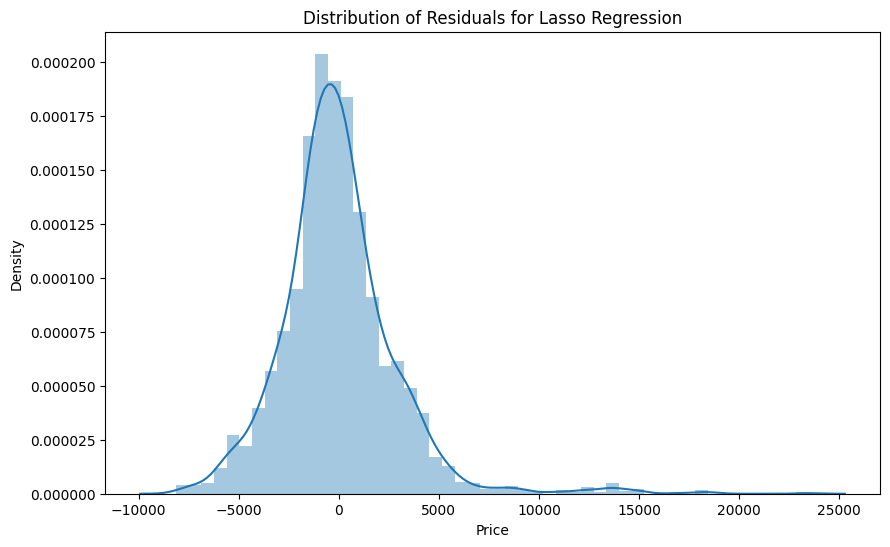

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for ElasticNet: {'regressor__selection': 'cyclic', 'regressor__precompute': False, 'regressor__positive': False, 'regressor__l1_ratio': 0.5, 'regressor__fit_intercept': True, 'regressor__alpha': 0.1}
Model: ElasticNet
r2_score: 0.5701456271429746
MSE :  8368232.845215112
MAE :  2002.7063607797015
RMSE :  2892.7898031511227
MAPE :  24.54844578062122


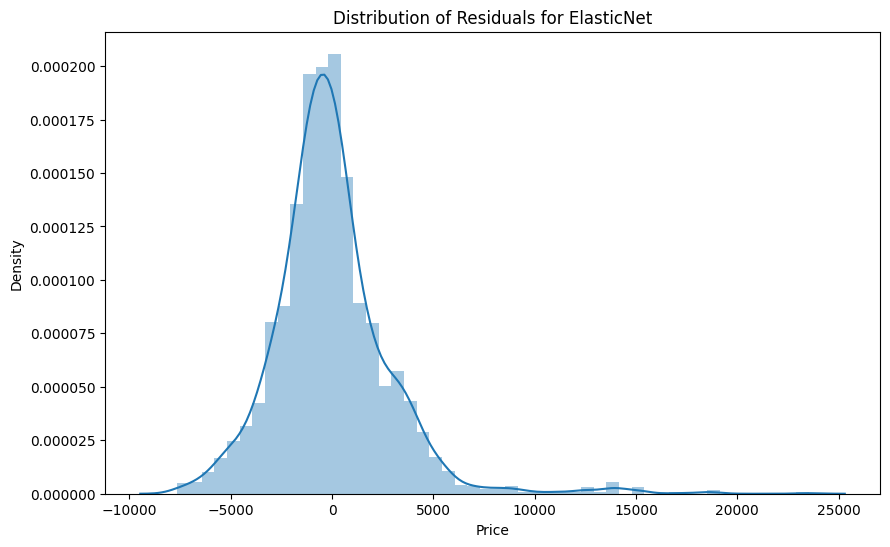

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for XGBoost: {'regressor__subsample': 0.9, 'regressor__reg_lambda': 1, 'regressor__reg_alpha': 0, 'regressor__n_estimators': 100, 'regressor__min_child_weight': 3, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.2, 'regressor__gamma': 0.2, 'regressor__colsample_bytree': 0.7, 'regressor__base_score': 0.5}
Model: XGBoost
r2_score: 0.8162709741284815
MSE :  3576763.12258618
MAE :  1314.075161949966
RMSE :  1891.2332279722086
MAPE :  15.156023355012918


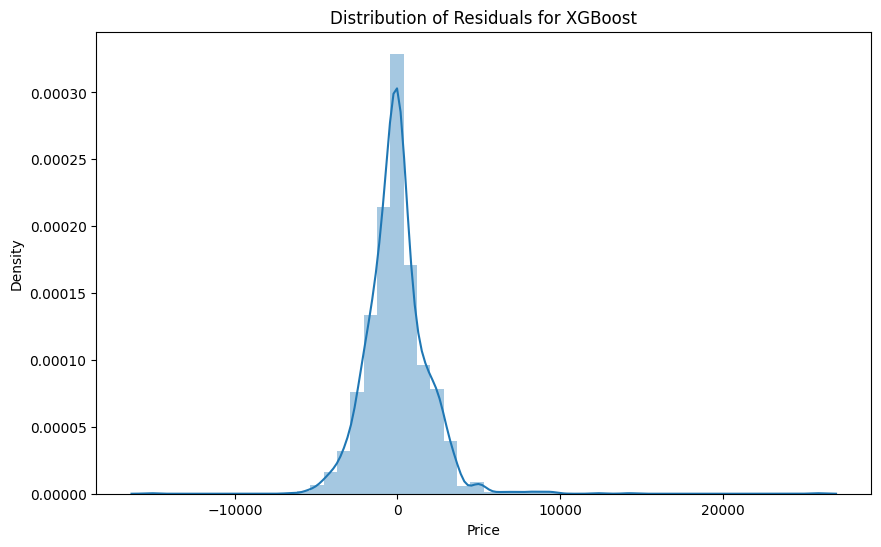

Best model 'XGBoost' with R2 score 0.8162709741284815 saved.


In [143]:
# Hyperparameter tuning for each model
for model_name, model in pipelines:
    param_dist = {}  # Define your hyperparameter search space
    
    if model_name == 'Random Forest':
        param_dist = {
            'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
            'regressor__max_features': ['auto', 'sqrt'],
            'regressor__max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4],
            'regressor__bootstrap': [True, False]
        }

    elif model_name == 'Gradient Boosting':
        param_dist = {
            'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
            'regressor__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
            'regressor__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'regressor__subsample': [0.8, 0.9, 1.0],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4]
        }

    # Add hyperparameter space for other models as needed
    # Hyperparameter search spaces for other models
    elif model_name == 'Linear Regression':
        param_dist = {
            'regressor__fit_intercept': [True, False],
            'regressor__copy_X': [True, False]
        }

    elif model_name == 'Support Vector Regressor':
        param_dist = {
            'regressor__C': [0.1, 1, 10, 100],
            'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'regressor__degree': [2, 3, 4, 5],
            'regressor__gamma': ['scale', 'auto'],
            'regressor__epsilon': [0.1, 0.2, 0.5, 1]
        }

    elif model_name == 'AdaBoost':
        param_dist = {
            'regressor__n_estimators': [50, 100, 200, 300],
            'regressor__learning_rate': [0.01, 0.1, 0.5, 1],
            'regressor__loss': ['linear', 'square', 'exponential']
        }

    elif model_name == 'Decision Tree':
        param_dist = {
            'regressor__criterion': ['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
            'regressor__splitter': ['best', 'random'],
            'regressor__max_depth': [None, 10, 20, 30, 40, 50],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4],
            'regressor__max_features': ['auto', 'sqrt', 'log2'],
        }

    elif model_name == 'K-Nearest Neighbors':
        param_dist = {
            'regressor__n_neighbors': [3, 5, 7, 9, 11],
            'regressor__weights': ['uniform', 'distance'],
            'regressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'regressor__p': [1, 2]
        }

    elif model_name == 'Ridge Regression':
        param_dist = {
            'regressor__alpha': np.logspace(-4, 4, 100),
            'regressor__solver': ['sparse_cg'],
            'regressor__max_iter': [100, 500, 1000],
            'regressor__tol': [1e-3, 1e-4, 1e-5],
            'regressor__fit_intercept': [True, False],
            'regressor__positive': [True, False],
            'regressor__random_state': [42],
            'regressor__copy_X': [True, False],
        }


    elif model_name == 'Lasso Regression':
        param_dist = {
            'regressor__alpha': np.logspace(-4, 4, 100),
            'regressor__selection': ['random'],
            'regressor__max_iter': [100, 500, 1000],
            'regressor__tol': [1e-3, 1e-4, 1e-5],
            'regressor__fit_intercept': [True, False],
            'regressor__positive': [True, False],
            'regressor__random_state': [42],
            'regressor__copy_X': [True, False],
            'regressor__precompute': [True, False],
            'regressor__warm_start': [True, False],
        }


    elif model_name == 'ElasticNet':
        param_dist = {
            'regressor__alpha': [0.1, 1, 10, 100],
            'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
            'regressor__fit_intercept': [True, False],
            'regressor__precompute': [True, False],
            'regressor__positive': [True, False],
            'regressor__selection': ['cyclic', 'random']
        }

    elif model_name == 'XGBoost':
        param_dist = {
            'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
            'regressor__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
            'regressor__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'regressor__subsample': [0.8, 0.9, 1.0],
            'regressor__min_child_weight': [1, 3, 5, 7],
            'regressor__gamma': [0, 0.1, 0.2, 0.3, 0.4],
            'regressor__colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'regressor__reg_alpha': [0, 0.1, 0.5, 1, 10],
            'regressor__reg_lambda': [0.1, 1, 5, 10],
            'regressor__base_score': [0.25, 0.5, 0.75, 1.0]
        }


    # Create and fit the RandomizedSearchCV
    randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)
    randomized_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print(f'Best hyperparameters for {model_name}: {randomized_search.best_params_}')

   # Model evaluation metrics
    y_prediction = randomized_search.best_estimator_.predict(X_test)
    r2 = metrics.r2_score(y_test, y_prediction)
    print(f'Model: {model_name}')
    print('r2_score:', r2)
    print('MSE : ', metrics.mean_squared_error(y_test, y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE : ', mape(y_test, y_prediction))
    best_r2_score = -float('inf')  # Initialize with negative infinity
    best_model_name = None
    best_model = None
    # Check if the current model has a higher R2 score than the best so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = model_name
        best_model = randomized_search.best_estimator_
    # Plotting the distribution of residuals
    plt.figure(figsize=(10, 6))
    sns.distplot(y_test - y_prediction)
    plt.title(f'Distribution of Residuals for {model_name}')
    plt.show()

# Save the best-tuned model using joblib
if best_model is not None:
    dump(best_model, f'{best_model_name}_best_model.joblib')
    print(f"Best model '{best_model_name}' with R2 score {best_r2_score} saved.")
else:
    print("No best model found.")

In [144]:
X_test.columns

Index(['Airline', 'Destination', 'Total_Stops', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [145]:
best_model = load('XGBoost_best_model.joblib')

In [146]:
# Test the best model on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
r2 = metrics.r2_score(y_test, y_pred)
print(f"R2 Score for the best model: {r2}")

# Additional metrics if needed
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score for the best model: 0.8162709741284815
MSE :  3576763.12258618
MAE :  1314.075161949966
RMSE :  1891.2332279722086
